# Resolvendo equações diferencias numericamente com o python

*Esta é uma breve descrição do que é integração numérica e um tutorial prático de como fazer isso em Python*

## Softwares necessários

*Para executar este notebook em seu próprio computador, você precisa instalar o seguinte software:*

* [python](http://python.org)
* [numpy](http://numpy.org) e [scipy](http://scipy.org) - biblioteca científica do python
* [matplotlib](http://matplotlib.org) - a biblioteca pra plotar gráficos
* O [ipython notebook](http://ipython.org/notebook.html) (agora renomeada como *Jupyter*)

No Windows e Mac, recomendamos instalar o [Anaconda distribution](https://store.continuum.io/cshop/anaconda/), que inclui todos os itens acima em um único pacote (entre várias outras bibliotecas), disponível em http://continuum.io/downloads.

No Linux, você pode instalar tudo usando a maneira preferida de sua distribuição, por exemplo:

* Debian/Ubuntu: `sudo apt-get install python-numpy python-scipy python-matplotlib python-ipython-notebook`
* Fedora: `sudo yum install python-numpy python-scipy python-matplotlib python-ipython-notebook`
* Arch: `sudo pacman -S python-numpy python-scipy python-matplotlib jupyter

Os trechos de código mostrados aqui também podem ser copiados em um arquivo de texto puro com extensão .py e executados fora do notebook (por exemplo, em um shell python ou ipython).

### Pela web
Como alternativa, você pode usar um serviço que executa notebooks na nuvem, por exemplo, [Google colab](https://colab.research.google.com/), [Jupyter lab](https://jupyter.org/try-jupyter/lab/), [SageMathCloud](https://cloud.sagemath.com/) ou [wakari](https://www.wakari.io/). Também é possível visualizar notebooks disponíveis publicamente usando http://nbviewer.ipython.org, mas nenhum cálculo pode ser realizado (apenas mostra resultados pré-calculados salvos).

## Como funciona a integração numérica

Digamos que temos uma equação diferencial que não sabemos (ou não queremos) derivar sua solução (analítica). Ainda podemos descobrir quais são as soluções por meio da **integração numérica**. Então, como isso funciona?

A ideia é aproximar a solução em pequenos intervalos de tempo sucessivos, extrapolando o valor da derivada em cada intervalo. Por exemplo, vamos tomar a equação diferencial

$$ \frac{dx}{dt} = f(x) = x (1 - x) $$

com um valor inicial $x_0 = 0.1$ em um momento inicial $t=0$ (ou seja, $x(0) = 0.1$). Em $t=0$, a derivada $\frac{dx}{dt}$ é igual a  $f(0.1) = 0.1 \times (1-0.1) = 0.09$. Escolhemos um pequeno passo de tempo, digamos, $\Delta t = 0.5$, e assumimos que esse valor da derivada é uma boa aproximação ao longo de todo este pequeno intervalo de $t=0$ até $t=0.5$. Isso significa que neste tempo $x$ vai aumentar $\frac{dx}{dt} \times \Delta t = 0.09 \times 0.5 = 0.045$. Portanto, nossa solução aproximada para $x$ em $t=0.5$ é $x(0) + 0.045 = 0.145$. Podemos então usar este valor de $x(0.5)$ para calcular o próximo ponto no tempo, $t=1$. Em resumo, calculamos a derivada em cada passo, multiplicando o resultado da derivada pelo passo de tempo, e aí somamos o resultado ao valor anterior da solução, conforme tabela abaixo:


| $t$ | $x$      | $\frac{dx}{dt}$  |
| ---:|---------:|----------:|
| 0   | 0.1      |  0.09     |
| 0.5 | 0.145    |  0.123975 |
| 1.0 | 0.206987 |  0.164144 |
| 1.5 | 0.289059 |  0.205504 |
| 2.0 | 0.391811 |  0.238295 |

Claro, isso é terrivelmente tedioso de fazer à mão, então podemos escrever um programa simples para fazer isso e fazer um gráfico  da solução. Abaixo, comparamos com a solução que obtivemos na tabela acima com intervalos de tempo $0.1$ com a solução analítica conhecida desta equação diferencial (a *equação logística*). **Não se preocupe com o código ainda**: existem maneiras melhores e mais simples de fazer isso! Os pontos são os valores aproximados para alguns momentos, e a linha mostra a solução analítica.

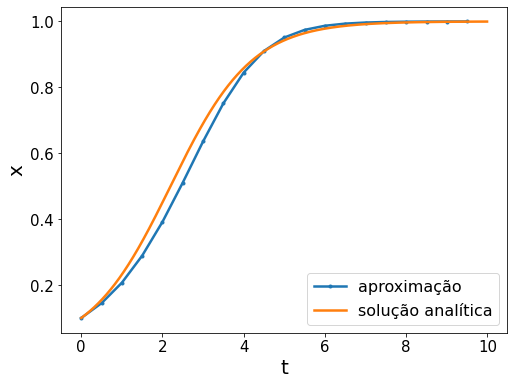

In [16]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

# Intervalos de tempo
tt = arange(0, 10, 0.5)
# Condição Inicial 
xx = [0.1]

def f(x):
    return x * (1.-x)

# loop sobre o tempo
for t in tt[1:]:
    xx.append(xx[-1] + 0.5 * f(xx[-1]))

# plottando
figure(figsize=(8, 6)) 
tick_params(labelsize= 15)
plot(tt, xx, '.-',linewidth=2.5)
ta = arange(0, 10, 0.01)
plot(ta, 0.1 * exp(ta)/(1+0.1*(exp(ta)-1.)),linewidth=2.5)
xlabel('t',fontsize=20)
ylabel('x',fontsize=20)
legend(['aproximação', 'solução analítica'], loc='best',fontsize=16)

## Por que usar bibliotecas científicas?

O método que acabamos de usar acima é chamado de *método de Euler* e é o mais simples disponível. O problema é que, embora funcione razoavelmente bem para a equação diferencial acima, em muitos casos não funciona muito bem. Há muitas maneiras de melhorá-lo: de fato, existem muitos livros inteiramente dedicados a isso. Embora muitos estudantes de matemática ou física aprendam a implementar métodos mais sofisticados, o tópico é realmente profundo. Felizmente, podemos contar com a experiência de muitas pessoas que já criaram bons algoritmos que funcionam bem na maioria das situações. Estes algoritmos estão já disponíveis na maioria das linguagens de programação. Aqui vamos usar uma ótima implementação disponível em Python.

## Então, como... ?

Vamos demonstrar como usar bibliotecas científicas para integrar equações diferenciais. Embora os comandos específicos dependam do software, o procedimento geral é geralmente o mesmo:

1. Defina os valores dos parâmetros e a condição inicial 
2. Escolha um intervalo de tempo ou uma sequência de tempos em que deseja a solução calculada
3. Definir a função derivada na linguagem computacional (o lado direito da equação diferencial)
4. passar a função, seqüência de tempo, parâmetros e condições iniciais para uma rotina de computador que executa a integração.

### Uma única equação

Então, vamos começar com a mesma equação acima, a equação logística, agora expressa com os parâmetros para taxa de crescimento ($r$) e capacidade de carga ($K$):

$$ \frac{dx}{dt} = f(x) = r x \left(1 - \frac{x}{K} \right) $$

E vamos usar o caso em que  $r=2$, $K=10$ e a condição inicial $x(0) = 0.1$. Mostramos como integrá-lo usando R abaixo:

#### 1. Defina os valores dos parâmetros e condição inicial

In [17]:
# Tudo após do '#' é um comentário

## começamos a importar as bibliotecas que vamos usar
# importa todas as funções (*) da biblioteca numpy, por exemplo, array, arange etc.
from numpy import *
# importa todas as funções de plotagem interativas (*), por exemplo, plot, xlabel etc.
from matplotlib.pyplot import *
# importa o integrador numérico que usaremos, odeint()
from scipy.integrate import odeint

# parâmetros
r = 2.
K = 10.
# Condição inicial
x0 = 0.1

#### 2. Escolha um intervalo de tempo ou uma sequência de tempos em que deseja a solução calculada
Note que estes são momentos no tempo para os quais você quer a solução. **Não são os intervalos de integração**, que são definidos internamente pela função de integração.

In [18]:
# passos de tempo: um array de valores começando de 0 até (mas
# excluindo) 10, em passos de 0,01
t = arange(0, 10., 0.01)

#### 3. Defina uma função em Python para a EDO ser integrada
Vamos definir o lado direito da equação diferencial. Este deve ser uma função da variável dependente (x) e do  tempo (t), mesmo que o tempo não apareça explicitamente. É assim que você define uma função:

In [19]:
def f(x, t, r, K):
    return r*x*(1-x/K)
# em python, não há chaves '{}' para iniciar ou
# finaliza uma função, nem nenhuma palavra-chave especial: o bloco está definido
# por espaços à esquerda (geralmente 4)
# aritmética é feita da mesma forma que em outras linguagens: + - * /

#### 4. Integrar a função
Agora, chamamos a função que faz a integração. A ordem dos argumentos é a seguinte: a função derivada, a condição inicial, os pontos onde queremos a solução, e uma lista de parâmetros:

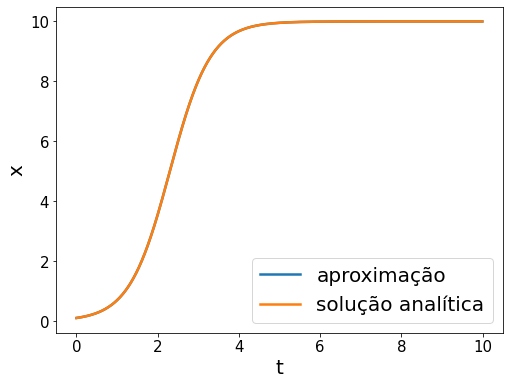

In [20]:
x = odeint(f, x0, t, (r, K))

# plotando a solução
figure(figsize=(8, 6)) 
tick_params(labelsize= 15)
plot(t, x,linewidth=2.5)
xlabel('t',fontsize=20) # definir rótulo do eixo x
ylabel('x',fontsize=20) # e do eixo y

# plotar solução analítica
# note que `t` é um array: quando você faz qualquer operação aritmética
# com um array, é o mesmo que fazer para cada elemento
plot(t, K * x0 * exp(r*t)/(K+x0*(exp(r*t)-1.)),linewidth=2.5)
legend(['aproximação', 'solução analítica'], loc='best',fontsize=20) # draw legend

Temos uma aproximação muito melhor agora, as duas curvas se sobrepõem!

Agora, e se quiséssemos integrar um sistema de equações diferenciais? Vamos pegar as equações de Lotka-Volterra:

$$ \begin{aligned}
\frac{dV}{dt} &= r V - c V P\\
\frac{dP}{dt} &= ec V P - dP
\end{aligned}$$


Neste caso, a variável não é mais um número, mas um array `[V, P]`. Fazemos o mesmo de antes, mas agora `x` será um array:

shape of x: (5000, 2)


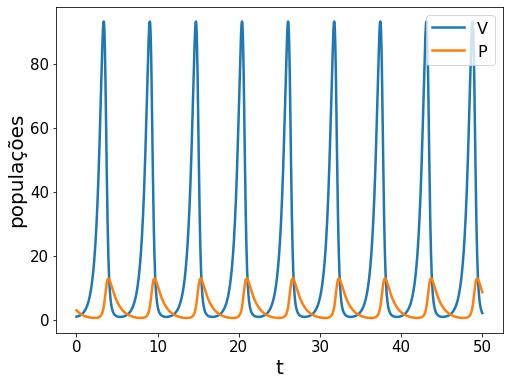

In [21]:

# não precisamos fazer isso de novo: se a célula acima já foi executada,
# as bibliotecas já foram importadas, mas repetimos aqui por conveniência.
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import odeint

t = arange(0, 50., 0.01)

# parâmetros
r = 2.
c = 0.5
e = 0.1
d = 1.

# condição inicial: este é um array agora!
x0 = array([1., 3.])

# a função ainda recebe apenas `x`, mas será um array, não um número
# em python, arrays são numerados de 0, então o primeiro elemento
# é x[0], o segundo é x[1]. Os colchetes `[ ]` definem um
# lista, que é convertida em um array usando a função `array()`.
# Observe que a primeira entrada corresponde a dV/dt e a segunda a dP/dt
def LV(x, t, r, c, e, d):
    return array([ r*x[0] - c * x[0] * x[1],
                   e * c * x[0] * x[1] - d * x[1] ])

# Agora, chamamos a função que faz a integração
# a ordem dos argumentos é a seguinte: a função derivada,
# a condição inicial, os pontos onde queremos a solução, e
# uma lista de parâmetros
x = odeint(LV, x0, t, (r, c, e, d))

# Agora `x` é um array de 2 dimensões de tamanho 5000 x 2 (5000 passos de tempo por 2
#variáveis). Podemos verificar assim:
print('shape of x:', x.shape)

# plotando as soluções
figure(figsize=(8, 6)) 
tick_params(labelsize= 15)
plot(t, x,linewidth=2.5)
xlabel('t',fontsize=20) # definindo rótulo do eixo x
ylabel('populações',fontsize=20) # e do eixo y
legend(['V', 'P'], loc='upper right',fontsize=16)

Uma coisa interessante a se fazer aqui é dar uma olhada no *espaço de fase*, ou seja, plotar apenas as variáveis ​​dependentes, sem respeito ao tempo:

Condições iniciais: [1. 3.]


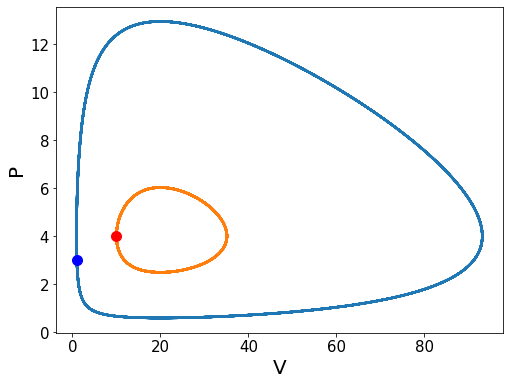

In [22]:
figure(figsize=(8, 6)) 
tick_params(labelsize= 15)
# `x[0,0]` é o primeiro valor (1ª linha, 1ª coluna), `x[0,1]` é o valor de
# a 1ª linha, 2ª coluna, que corresponde ao valor de P no tempo
# inicial. Traçamos apenas este ponto primeiro para saber onde começamos:
plot(x[0,0], x[0,1], 'o',markersize=10,zorder=3, color='blue')
print('Condições iniciais:', x[0])

# `x[0]` ou (equivalentemente) x[0,:] é a primeira linha e `x[:,0]` é a primeira
# coluna. Observe que os dois pontos `:` representam todos os valores desse eixo. Nós iremos
# plotar a segunda coluna (P) contra a primeira (V):
plot(x[:,0], x[:,1],linewidth=2.4)
xlabel('V',fontsize=20)
ylabel('P',fontsize=20)

# Vamos calcular e plotar outra solução com uma condição inicial diferente
x2 = odeint(LV, [10., 4.], t, (r, c, e, d))
plot(x2[:,0], x2[:,1],linewidth=2.5)
plot(x2[0,0], x2[0,1], 'o',markersize=10,color='red')

**Parabéns**: agora você está pronto para integrar qualquer sistema de equações diferenciais! (Esperamos que generalizar o acima para mais de 2 equações não seja muito desafiador).

### Mais informações:

* [Tutorial de Python](http://docs.python.org/3/tutorial/index.html) (capítulos 3 a 5 são especialmente úteis)
* [Uma introdução ao Numpy](http://nbviewer.ipython.org/github/iguananaut/notebooks/blob/master/numpy.ipynb)
* [Mais um](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-2-Numpy.ipynb), indo um pouco mais a fundo.
* [The matplotlib gallery](http://matplotlib.org/gallery.html): todos os tipos de gráficos, com código de exemplo para usar.